In [ ]:
from concurrent.futures import ThreadPoolExecutor

import numpy as np
import os
from pathlib import Path
import torch
from tqdm.notebook import tqdm

from functions.processing.recordings import process_and_save_as_pt, add_white_noise, modulate_volume, random_cutout, pitch_warp, apply_augmentation_transforms
from functions.processing.retrieval import loadPT
from functions.plotting.spectrograms import plot_spectrograms_dual

In [ ]:
# --- Setup Paths ---
input_dir = Path("Z:\\Audio_data\\Dawn_chorus_conversion_flac")
output_dir = Path("./AudioTensors")
output_dir.mkdir(exist_ok=True)

# Find all files
audio_files = list(input_dir.glob("*.flac"))

print(f"Total files to process: {len(audio_files)}")

# --- Execution ---
# We use max_workers to run multiple FFmpeg instances at once
with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    # Use a list to hold the results so tqdm can track progress
    results = list(tqdm(
        executor.map(lambda f: process_and_save_as_pt(f, output_dir, target_sr=16000), audio_files), 
        total=len(audio_files),
        desc="Converting to .pt"
    ))

print(f"Success: {sum(results)} | Failed: {len(results) - sum(results)}")

In [4]:
input_dir = Path("./AudioTensors")
audio_files = list(input_dir.glob("*.pt"))

In [5]:
tens = loadPT(audio_files[0])

In [25]:
add_white_noise(tens)

tensor([-2.7289e-05,  1.1626e-03,  7.5855e-03,  ...,  9.3547e-02,
         8.8321e-02,  8.7717e-02])

In [28]:
modulate_volume(tens)

tensor([0.0000, 0.0000, 0.0000,  ..., 0.0573, 0.0561, 0.0561],
       dtype=torch.float16)

In [39]:
random_cutout(tens)

tensor([0.0000, 0.0000, 0.0000,  ..., 0.0921, 0.0901, 0.0901],
       dtype=torch.float16)

In [20]:
pitch_warp(tens)

tensor([0.0000, 0.0000, 0.0000,  ..., 0.1039, 0.0957, 0.0495],
       dtype=torch.float16)

In [ ]:
apply_augmentation_transforms(tens, [modulate_volume, pitch_warp, add_white_noise])

tensor([-0.0001, -0.0024,  0.0009,  ...,  0.0862,  0.0862,  0.0348])

In [ ]:
input_dir = Path("./AudioTensors")
audio_files = list(input_dir.glob("*.pt"))

with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    # Use a list to hold the results so tqdm can track progress
    results = list(tqdm(
        executor.map(lambda f: loadPT(f), audio_files), 
        total=len(audio_files),
        desc="Loading files"
    ))

In [ ]:
input_dir = Path("./AudioTensors")
audio_files = list(input_dir.glob("*.pt"))

Getting ./AudioTensors\27255833_audio.pt
Getting ./AudioTensors\27280455_audio.pt
Getting ./AudioTensors\27275614_audio.pt
Getting ./AudioTensors\27270668_audio.pt
Getting ./AudioTensors\27315946_audio.pt
Getting ./AudioTensors\27255819_audio.pt
Getting ./AudioTensors\27305549_audio.pt
Getting ./AudioTensors\27270648_audio.pt
Getting ./AudioTensors\27275613_audio.pt


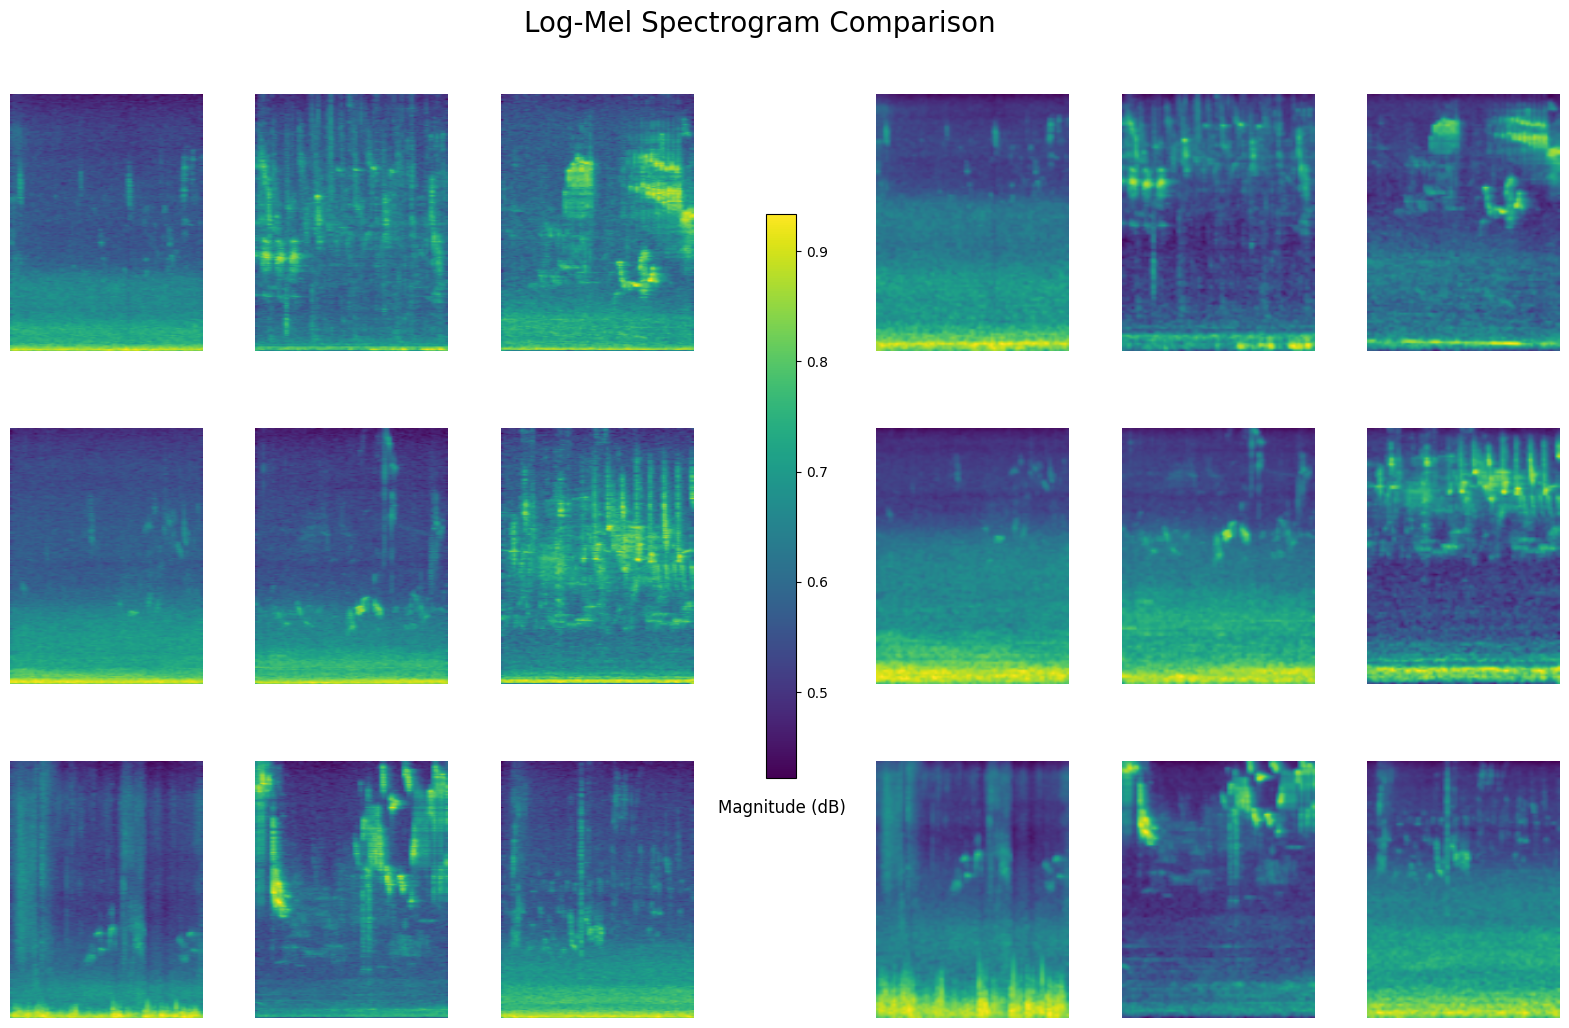

In [3]:
plot_spectrograms_dual(audio_files)